In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

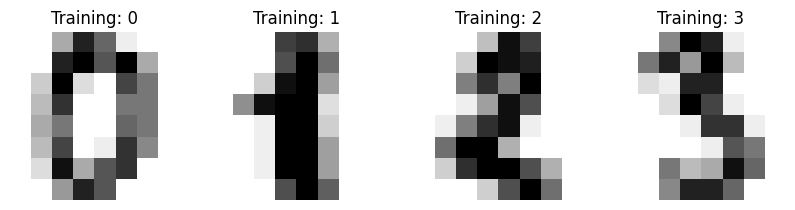

In [3]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [17]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)
#computing p(k)
p = [[],[],[],[],[],[],[],[],[],[]]
count = [0,0,0,0,0,0,0,0,0,0]
pk=[0,0,0,0,0,0,0,0,0,0]
for y in y_train:
    count[y]=count[y]+1

for c in range(len(count)):
    pk[c] = (count[c]/len(y_train))

In [51]:
means=[[0]*64,[0]*64,[0]*64,[0]*64,[0]*64,[0]*64,[0]*64,[0]*64,[0]*64,[0]*64] #will hold [(mean, std)i ...., (mean,std)j] values
for x, y in zip(X_train, y_train):
    means[y]= means[y] +x

for y in range(len(count)):
     means[y] = means[y]/count[y]
        
print(means)

    

[array([ 0.        ,  0.        ,  3.75555556, 13.01111111, 11.62222222,
        3.33333333,  0.04444444,  0.        ,  0.        ,  0.76666667,
       12.62222222, 14.01111111, 12.5       , 11.74444444,  1.38888889,
        0.        ,  0.        ,  3.7       , 14.81111111,  5.55555556,
        2.85555556, 12.31111111,  4.15555556,  0.        ,  0.        ,
        5.28888889, 13.27777778,  1.7       ,  0.23333333,  9.8       ,
        6.45555556,  0.        ,  0.        ,  5.8       , 12.01111111,
        0.8       ,  0.04444444,  9.65555556,  6.86666667,  0.        ,
        0.        ,  3.43333333, 13.58888889,  2.14444444,  1.44444444,
       11.97777778,  5.44444444,  0.        ,  0.        ,  0.78888889,
       13.16666667, 10.52222222, 10.86666667, 13.72222222,  2.17777778,
        0.        ,  0.        ,  0.        ,  4.04444444, 13.37777778,
       13.52222222,  4.95555556,  0.16666667,  0.        ]), array([ 0.        ,  0.02197802,  2.15384615,  7.94505495, 10.95604396,
  

In [24]:
variance = [[0]*64,[0]*64,[0]*64,[0]*64,[0]*64,[0]*64,[0]*64,[0]*64,[0]*64,[0]*64]
for x,y in zip(X_train, y_train):
    variance[y]= variance[y]+(np.square(x-means[y]))

for y in range(len(count)):
     variance[y] = variance[y]/count[y]

std =np.sqrt(variance)
print(std)

[[0.         0.         2.58332736 2.2035045  3.13963118 3.2249031
  0.20608041 0.         0.         1.27410099 2.81495126 2.78286201
  3.57226974 3.54827379 2.24447195 0.         0.         2.46959286
  1.79440144 4.78913379 3.74035385 3.80830801 2.92465045 0.
  0.         2.28154161 3.01119311 2.58822118 0.68394282 3.9163475
  2.19677092 0.         0.         2.06666667 3.03861973 1.5860503
  0.33035708 3.63978361 2.36737079 0.         0.         2.17587786
  2.13382517 3.33853298 2.83670823 3.27270794 3.32034507 0.
  0.         1.277971   2.6925824  4.05031625 3.84476556 2.36656233
  2.7951457  0.         0.         0.         2.56433275 2.0032073
  1.79026862 3.41210626 0.63683244 0.        ]
 [0.         0.14661169 3.18279398 6.05898232 4.6312652  5.35091495
  2.41047907 0.         0.         0.20499734 4.21720388 5.76530479
  4.12068864 6.10900065 3.07386033 0.         0.         1.48477765
  5.36218697 2.59912761 3.77443334 5.81184679 2.07852139 0.
  0.         2.73959372 5.687

In [54]:
prob = [1]*10
classifications=[]
for x in X_test:
    for i in range(len(means)):
        pxk=1
        prob[1]*10
        for num in range(len(x)):
            if(std[i][num] !=0):
                element1=(1.0/(std[i][num]*(np.sqrt(2)*3.14)))
                element2=(np.pow(np.e, ((-.5)*(np.square((x[num]-means[i][num])/std[i][num])))))
                pxk = pxk*(element2*element1)/pk[i]
        prob[i]= pxk
    classifications.append(np.argsort(prob)[9])

miss=0
for num in range(len(y_test)):
    print(y_test[num], "\t", classifications[num].item())
    if(y_test[num] != classifications[num].item()):
        miss=miss+1
print("accuracy: ",((len(y_test)-miss)/(len(y_test)))*100)
    

8 	 8
8 	 5
4 	 4
9 	 9
0 	 0
8 	 8
9 	 9
8 	 8
1 	 2
2 	 2
3 	 3
4 	 4
5 	 5
6 	 6
7 	 7
8 	 8
9 	 9
0 	 0
1 	 2
2 	 2
3 	 3
4 	 4
5 	 5
6 	 6
7 	 7
8 	 8
9 	 9
0 	 0
1 	 1
2 	 2
3 	 3
4 	 4
5 	 9
6 	 6
7 	 7
8 	 8
9 	 9
0 	 0
9 	 9
5 	 9
5 	 5
6 	 6
5 	 3
0 	 0
9 	 9
8 	 8
9 	 9
8 	 8
4 	 7
1 	 1
7 	 7
7 	 7
3 	 2
5 	 3
1 	 1
2 	 2
7 	 7
8 	 8
2 	 2
0 	 0
1 	 1
2 	 2
6 	 6
3 	 3
3 	 3
7 	 7
3 	 3
3 	 3
4 	 4
6 	 6
6 	 6
6 	 6
4 	 4
9 	 9
1 	 1
5 	 5
0 	 0
9 	 9
5 	 5
2 	 2
8 	 8
2 	 2
0 	 0
0 	 0
1 	 1
7 	 7
6 	 6
3 	 9
2 	 2
1 	 2
4 	 0
6 	 6
3 	 3
1 	 1
3 	 2
9 	 9
1 	 1
7 	 7
6 	 6
8 	 8
4 	 1
3 	 3
1 	 1
4 	 4
0 	 0
5 	 5
3 	 3
6 	 6
9 	 9
6 	 6
1 	 1
7 	 7
5 	 9
4 	 4
4 	 1
7 	 7
2 	 2
8 	 8
2 	 2
2 	 2
5 	 9
7 	 7
9 	 9
5 	 3
4 	 7
4 	 7
9 	 9
0 	 0
8 	 8
9 	 9
8 	 8
0 	 0
1 	 1
2 	 2
3 	 3
4 	 7
5 	 5
6 	 6
7 	 7
8 	 8
9 	 3
0 	 0
1 	 1
2 	 2
3 	 3
4 	 7
5 	 5
6 	 6
7 	 7
8 	 8
9 	 9
0 	 0
1 	 1
2 	 2
3 	 3
4 	 4
5 	 5
6 	 6
7 	 7
8 	 2
9 	 9
0 	 0
9 	 9
5 	 5
5 	 5
6 	 6
5 	 

Confusion matrix:
[[84  0  1  0  3  0  0  0  0  0]
 [ 0 54  6  0  5  1  0  0 12 13]
 [ 0  0 85  0  0  0  0  0  0  1]
 [ 0  0  6 73  0  2  0  1  6  3]
 [ 1  3  0  0 76  0  0  8  3  1]
 [ 0  1  0  3  0 76  0  0  2  9]
 [ 0  1  7  0  0  1 82  0  0  0]
 [ 0  0  5  0  3  3  0 78  0  0]
 [ 0  1 12  0  2  7  0  0 57  9]
 [ 0  0  3  2  0  2  0  2  2 81]]


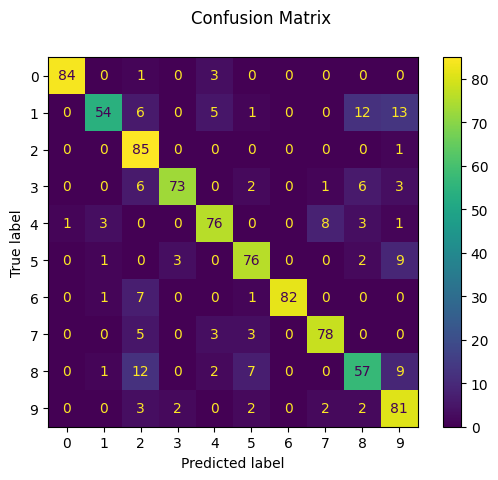

In [55]:
for i in range(len(classifications)):
    classifications[i] = classifications[i].item()

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, classifications)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

Here we can see the classification matrix for our model, we can see that overall we have a pretty good accuracy of 82%, with most misclassifications occuring with 1s being classified as either 9 or 8. this intuitively doesnt really make sense, since 1s do not look like 9s or 8s. We also had some misclassifications of 8s beig predicted as 12, this makes somewhat more sense, since they are more or less similar in values and in shape.